In [1]:
%matplotlib notebook
from ipynb.fs.defs.utilities import *

# Interval analysis for the determination of the workspace of an electromagnetic navigation system


The interval analysis method for the determination of the workspace of 2d electromagnetic navigation system is adapted from the approch proposed in [Gouttefarde 2011](https://ieeexplore.ieee.org/document/5657268) for parallel cable-driven robot.

The method essentially consists in using interval arithmetic to check boxes of space instead of individual poses.

This is valid for linear magnetic model with dipole terms only (see .yaml file in the models folder of this repository).

**N.B.** This notebook requires the library [PyInterval](https://pyinterval.readthedocs.io/en/latest/index.html) and the [python binding](https://benensta.github.io/pyIbex/) of [ibex](http://www.ibex-lib.org/).

The method is applied here to a 2d example previously treated with a discretization approach.

## Application to a 2D example

In [2]:
# Load systems calibration
cal_path_mns = 'models/mns_2coils_90deg.yaml'
model_mns = ForwardModelMPEM()
model_mns.setCalibrationFile(cal_path_mns)

In [3]:
#Build initial box
pmin = -0.1
pmax = 0.1
xi = interval[pmin, pmax] 
yi = interval[pmin, pmax]
z = 0.
InitBox = Create2DBox(xi,yi)

#Define inputs interval and task set
Imin = -1
Imax = 1
bmin = -0.02
bmax = 0.02

#Load system model
yaml_file = open(cal_path_mns)
parsed_yaml_file = yaml.load(yaml_file, Loader=yaml.FullLoader)

#Define precision of bissection and run the determination algoritgm
eps = 0.005
L, Lin, Lout, Lneg, iteration = Ws2DDetermination(InitBox, bmin, bmax, Imin, Imax, eps, parsed_yaml_file,z)

<IPython.core.display.Javascript object>


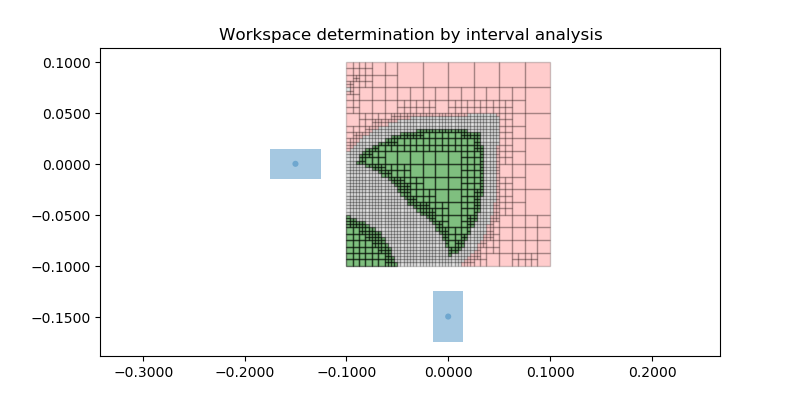

Text(0.5, 1.0, 'Workspace determination by interval analysis')

In [4]:
coil_length = 0.05
coil_width = 0.03

fig = plt.figure(figsize=(8, 4))

ax = fig.gca()

#Plot rectangle in
for i in range(len(Lin)):
    Box = Lin[i]
    xo = Box[0][0][0][0]
    yo = Box[1][0][0][0]
    dx = Box[0][0][0][1] - xo
    dy = Box[1][0][0][1] - yo
    rect = patches.Rectangle((xo,yo),dx,dy,linewidth=1,edgecolor='black',facecolor='green',alpha=0.5)
    ax.add_patch(rect)
    
#Plot rectangle undetermined
for i in range(len(Lneg)):
    Box = Lneg[i]
    xo = Box[0][0][0][0]
    yo = Box[1][0][0][0]
    dx = Box[0][0][0][1] - xo
    dy = Box[1][0][0][1] - yo
    rect = patches.Rectangle((xo,yo),dx,dy,linewidth=1,edgecolor='black',facecolor='gray',alpha=0.2)
    ax.add_patch(rect)
    
#Plot rectangle out
for i in range(len(Lout)):
    Box = Lout[i]
    xo = Box[0][0][0][0]
    yo = Box[1][0][0][0]
    dx = Box[0][0][0][1] - xo
    dy = Box[1][0][0][1] - yo
    rect = patches.Rectangle((xo,yo),dx,dy,linewidth=1,edgecolor='black',facecolor='red',alpha=0.2)
    ax.add_patch(rect)

#Plot coils
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns)
ax.add_collection(coll)
 
#Plot figure
plt.show()
ax.axis('equal')
ax.set_title('Workspace determination by interval analysis')
